# Best MLP Model - Running on Test Set

## Necessary Importations and Code

**NOTE: THIS CAN ONLY BE RUN THROUGH GOOGLE COLLAB, HENCE PLEASE PLACE MY FOLDER OF CODE INTO YOUR OWN DIRECTORY ON YOUR GOOGLE DRIVE, MOUNT IT VIA THE SECOND CELL, THEN AMEND BOTH PATHS IN THE THIRD CELL TO THE PATH YOU'VE STORED IT IN FOR THE CODE TO RUN**

**THIS CODE IS SIMPLY MADE JUST SO YOU CAN RUN THE CODE ON THE TEST SET, ALL EXPLANATIONS OF MODELLING CHOICES HAVE BEEN COMMENTED IN THE MAIN NOTEBOOKS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTENC

from imblearn.under_sampling import EditedNearestNeighbours

from imblearn.pipeline import Pipeline

import io

import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# AMEND THE PATHS IN THIS CELL TO YOUR SYSTEM

# Changing Directory
%cd /content/drive/My Drive/NeuralComputing

# Getting Model:
with open("/content/drive/MyDrive/NeuralComputing/best_svm.pkl", "rb") as best_svm:
    model_extract = pickle.load(best_svm)

/content/drive/My Drive/NeuralComputing


In [4]:
df = pd.read_csv('cleaned3.csv')

df.drop('Unnamed: 0', axis = 1, inplace = True)

df

,male,age,currentSmoker,cigsG0,cigsG1,cigsG2,cigsG3,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucG0,glucG1,glucG2,TenYearCHD
0,1.0,39,0.0,1,0,0,0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,0,1,0,0
1,0.0,46,0.0,1,0,0,0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,0,1,0,0
2,1.0,48,1.0,0,0,1,0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,1,0,0,0
3,0.0,61,1.0,0,0,0,1,0.0,1.0,0.0,225.0,150.0,95.0,28.58,0,1,0,1
4,0.0,46,1.0,0,0,1,0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,0.0,48,1.0,0,0,1,0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,0,1,0,0
4128,0.0,44,1.0,0,0,1,0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,0,1,0,0
4129,0.0,52,0.0,1,0,0,0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,0,1,0,0
4130,1.0,40,0.0,1,0,0,0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,0,1,0,0


In [5]:
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state = 42) 

## Modelling on Test Set (CAN SIMPLY RUN ONCE ABOVE TWO FILE PATHS HAVE BEEN AMENDED TO YOUR SYSTEM)

In [6]:
model_extract

Pipeline(steps=[('undersample', EditedNearestNeighbours()),
                ('smote',
                 SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 7, 8, 9, 14,
                                               15, 16],
                         random_state=42, sampling_strategy='not majority')),
                ('scalings', StandardScaler()),
                ('model2', SVC(C=1, gamma=0.01, kernel='sigmoid'))])

In [7]:
y_predictions = model_extract.predict(X_test)

In [8]:
print('Printing Classification Report:')
print(classification_report(y_test, y_predictions))

Printing Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       702
           1       0.26      0.68      0.38       125

    accuracy                           0.66       827
   macro avg       0.59      0.67      0.57       827
weighted avg       0.82      0.66      0.71       827



Printing Confusion Matrix


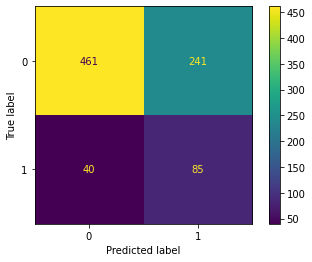

In [9]:
# Getting Confusion Matrix
print('Printing Confusion Matrix')
cm = confusion_matrix(y_test, y_predictions)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()
plt.show()

Printing ROC Curve: 


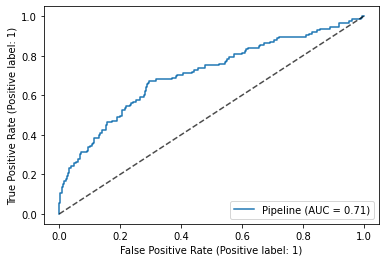

In [10]:
print('Printing ROC Curve: ')
plot_roc_curve(model_extract, X_test, y_test) 
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()